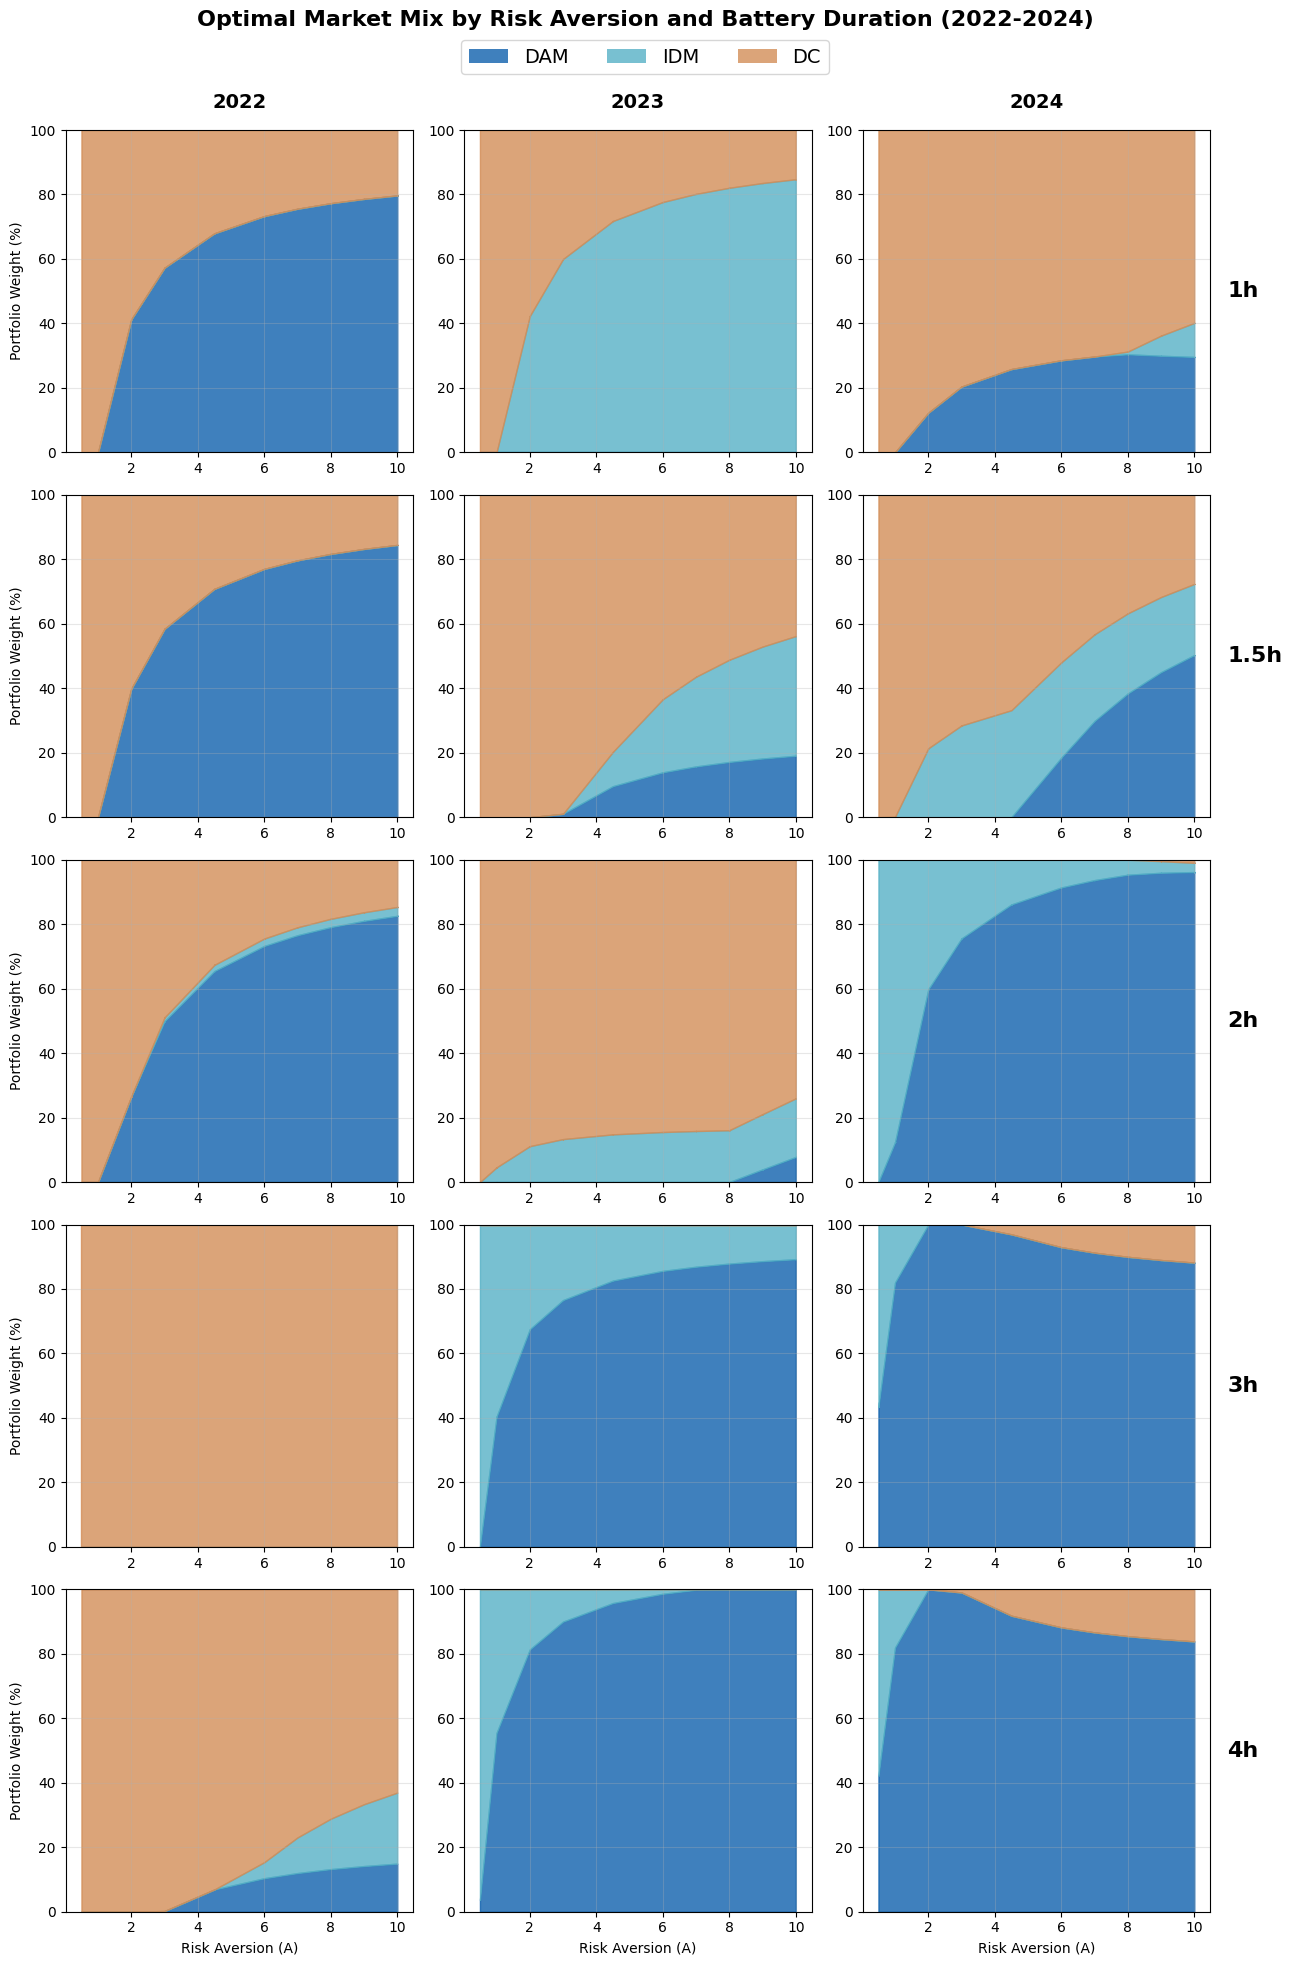

In [4]:
'''BIG PLOT for Risk aversion section'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all years data with absolute paths
base_path = '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration'

df_2022 = pd.read_csv(f'{base_path}/Figure_12_Model_Outputs/figure_12_2022.csv')
df_2022['duration'] = df_2022['energy_mwh'] / df_2022['power_mw']
df_2022['year'] = 2022

df_2023 = pd.read_csv(f'{base_path}/Figure_12_Model_Outputs/figure_12_2023.csv')
df_2023['duration'] = df_2023['energy_mwh'] / df_2023['power_mw']
df_2023['year'] = 2023

df_2024 = pd.read_csv(f'{base_path}/Figure_12_Model_Outputs/figure_12_2024.csv')
df_2024['duration'] = df_2024['energy_mwh'] / df_2024['power_mw']
df_2024['year'] = 2024

# Combine all data
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Get common durations across all years
common_durations = sorted(set(df_2022['duration']) & set(df_2023['duration']) & set(df_2024['duration']))[:5]
years = [2022, 2023, 2024]

colors = {'DAM': "#0f61ad99", 'IDM': "#56b1c6c7", 'DC': "#d38d5763"}

# Create the multi-year comparison plot
fig, axes = plt.subplots(len(common_durations), 3, figsize=(13, 4*len(common_durations)))

for i, duration in enumerate(common_durations):
    for j, year in enumerate(years):
        ax = axes[i, j]
        
        # Get data for this duration and year
        subset = df_all[(df_all['duration'] == duration) & (df_all['year'] == year)].sort_values('risk_aversion')
        
        if not subset.empty:
            # Create stacked areas
            ax.fill_between(subset['risk_aversion'], 0, subset['baseline_dam_weight'] * 100, 
                            color=colors['DAM'], alpha=0.8, label='DAM')
            ax.fill_between(subset['risk_aversion'], subset['baseline_dam_weight'] * 100, 
                            (subset['baseline_dam_weight'] + subset['baseline_idm_weight']) * 100, 
                            color=colors['IDM'], alpha=0.8, label='IDM')
            ax.fill_between(subset['risk_aversion'], 
                            (subset['baseline_dam_weight'] + subset['baseline_idm_weight']) * 100, 100,
                            color=colors['DC'], alpha=0.8, label='DC')
        
         # Only show x-axis labels on bottom row
        if i == len(common_durations) - 1:
            ax.set_xlabel('Risk Aversion (A)', fontsize=10)
        
        # Only show y-axis labels on leftmost column
        if j == 0:
            ax.set_ylabel('Portfolio Weight (%)', fontsize=10)
            
        # Set labels and formatting
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 100)
        
# Add row labels (durations) - horizontal labels on the right side
for i, duration in enumerate(common_durations):
    # Format duration labels properly
    if duration == int(duration):
        duration_label = f'{int(duration)}h'
    else:
        duration_label = f'{duration}h'

    # Add duration label horizontally on the right side of each row
    axes[i, -1].text(1.05, 0.5, duration_label, 
                     transform=axes[i, -1].transAxes,
                     fontsize=16, fontweight='bold', color='black',
                     ha='left', va='center', rotation=0)

# Add column labels (years) as titles on top row
for j, year in enumerate(years):
    axes[0, j].set_title(str(year), fontsize=14, fontweight='bold', pad=16)

# Add overall title and legend with bigger size and proper spacing
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['DAM'], alpha=0.8, label='DAM'),
                   Patch(facecolor=colors['IDM'], alpha=0.8, label='IDM'),
                   Patch(facecolor=colors['DC'], alpha=0.8, label='DC')]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.97), 
           ncol=3, fontsize=14, frameon=True)

plt.suptitle('Optimal Market Mix by Risk Aversion and Battery Duration (2022-2024)', 
             fontsize=16, y=0.98, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()